In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Dataset.csv')

In [7]:
df.head()

,title,parsed_content,date,time
0,Hay más de 1.300 dominios de primer nivel (ade...,Me encontré un enlace oficial y actualizado ...,2024-12-02,13:18:03
1,"Luxury brands are betting big on India, and so...",As luxury brands increase their sales in Indi...,2024-11-28,03:42:20
2,Cloudflare 2024 Year in Review,Subscribe to receive notifications of new pos...,2024-12-09,14:00:00
3,Cloudflare 2024 Year in Review,Subscribe to receive notifications of new pos...,2024-12-09,14:00:00
4,India's Bharti Airtel signs 'multi-billion' do...,We are experiencing some temporary issues. Th...,2024-12-04,08:26:10


In [8]:
data_column=df["title"]

In [9]:

import spacy
from spacy import displacy
from spacy.lang.en import English
spacy.__version__


'3.7.5'

In [10]:

nlp = spacy.load("en_core_web_sm")

In [12]:
entities1 = []
labels1 = []
for i in data_column:
  doc = nlp(i)
  for ent in doc.ents:
      entities1.append(ent)
      labels1.append(ent.label_)

df = pd.DataFrame({'Entities':entities1,'Labels':labels1})

In [14]:
df.head(10)

,Entities,Labels
0,(1.300),CARDINAL
1,"(de, ellos, muy)",PERSON
2,(India),GPE
3,"(Cloudflare, 2024, Year)",ORG
4,(Review),GPE
5,"(Cloudflare, 2024, Year)",ORG
6,(Review),GPE
7,(India),GPE
8,"(Bharti, Airtel)",FAC
9,"(multi, -, billion, ', dollar)",MONEY


In [15]:

k=0
lst=[]
for i in df["Entities"]:
  lst.append(i)
  k+=1

In [16]:
kst=[]
for i in lst:
  kst.append(i.text)


In [17]:

df["entities_"]=kst
df=df.drop(["Entities"],axis=1)

In [18]:
df.head()

,Labels,entities_
0,CARDINAL,1.300
1,PERSON,de ellos muy
2,GPE,India
3,ORG,Cloudflare 2024 Year
4,GPE,Review


In [19]:
df.value_counts()

Labels       entities_        
GPE          India                14
CARDINAL     5                     5
PRODUCT      Airtel                5
ORG          Cabinet               4
PRODUCT      Telcos                4
                                  ..
MONEY        6                     1
             4.25B                 1
             $6 Billion            1
GPE          Showcasing            1
WORK_OF_ART  Exclusive Content     1
Name: count, Length: 160, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


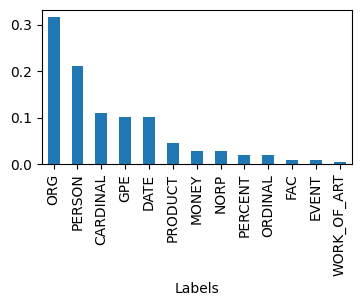

In [21]:
df["Labels"].value_counts(normalize=True).plot.bar(figsize=(4,2))
plt.show()

In [23]:
importance_org = (df["entities_"][df['Labels']=='ORG']).value_counts()


<Axes: ylabel='entities_'>

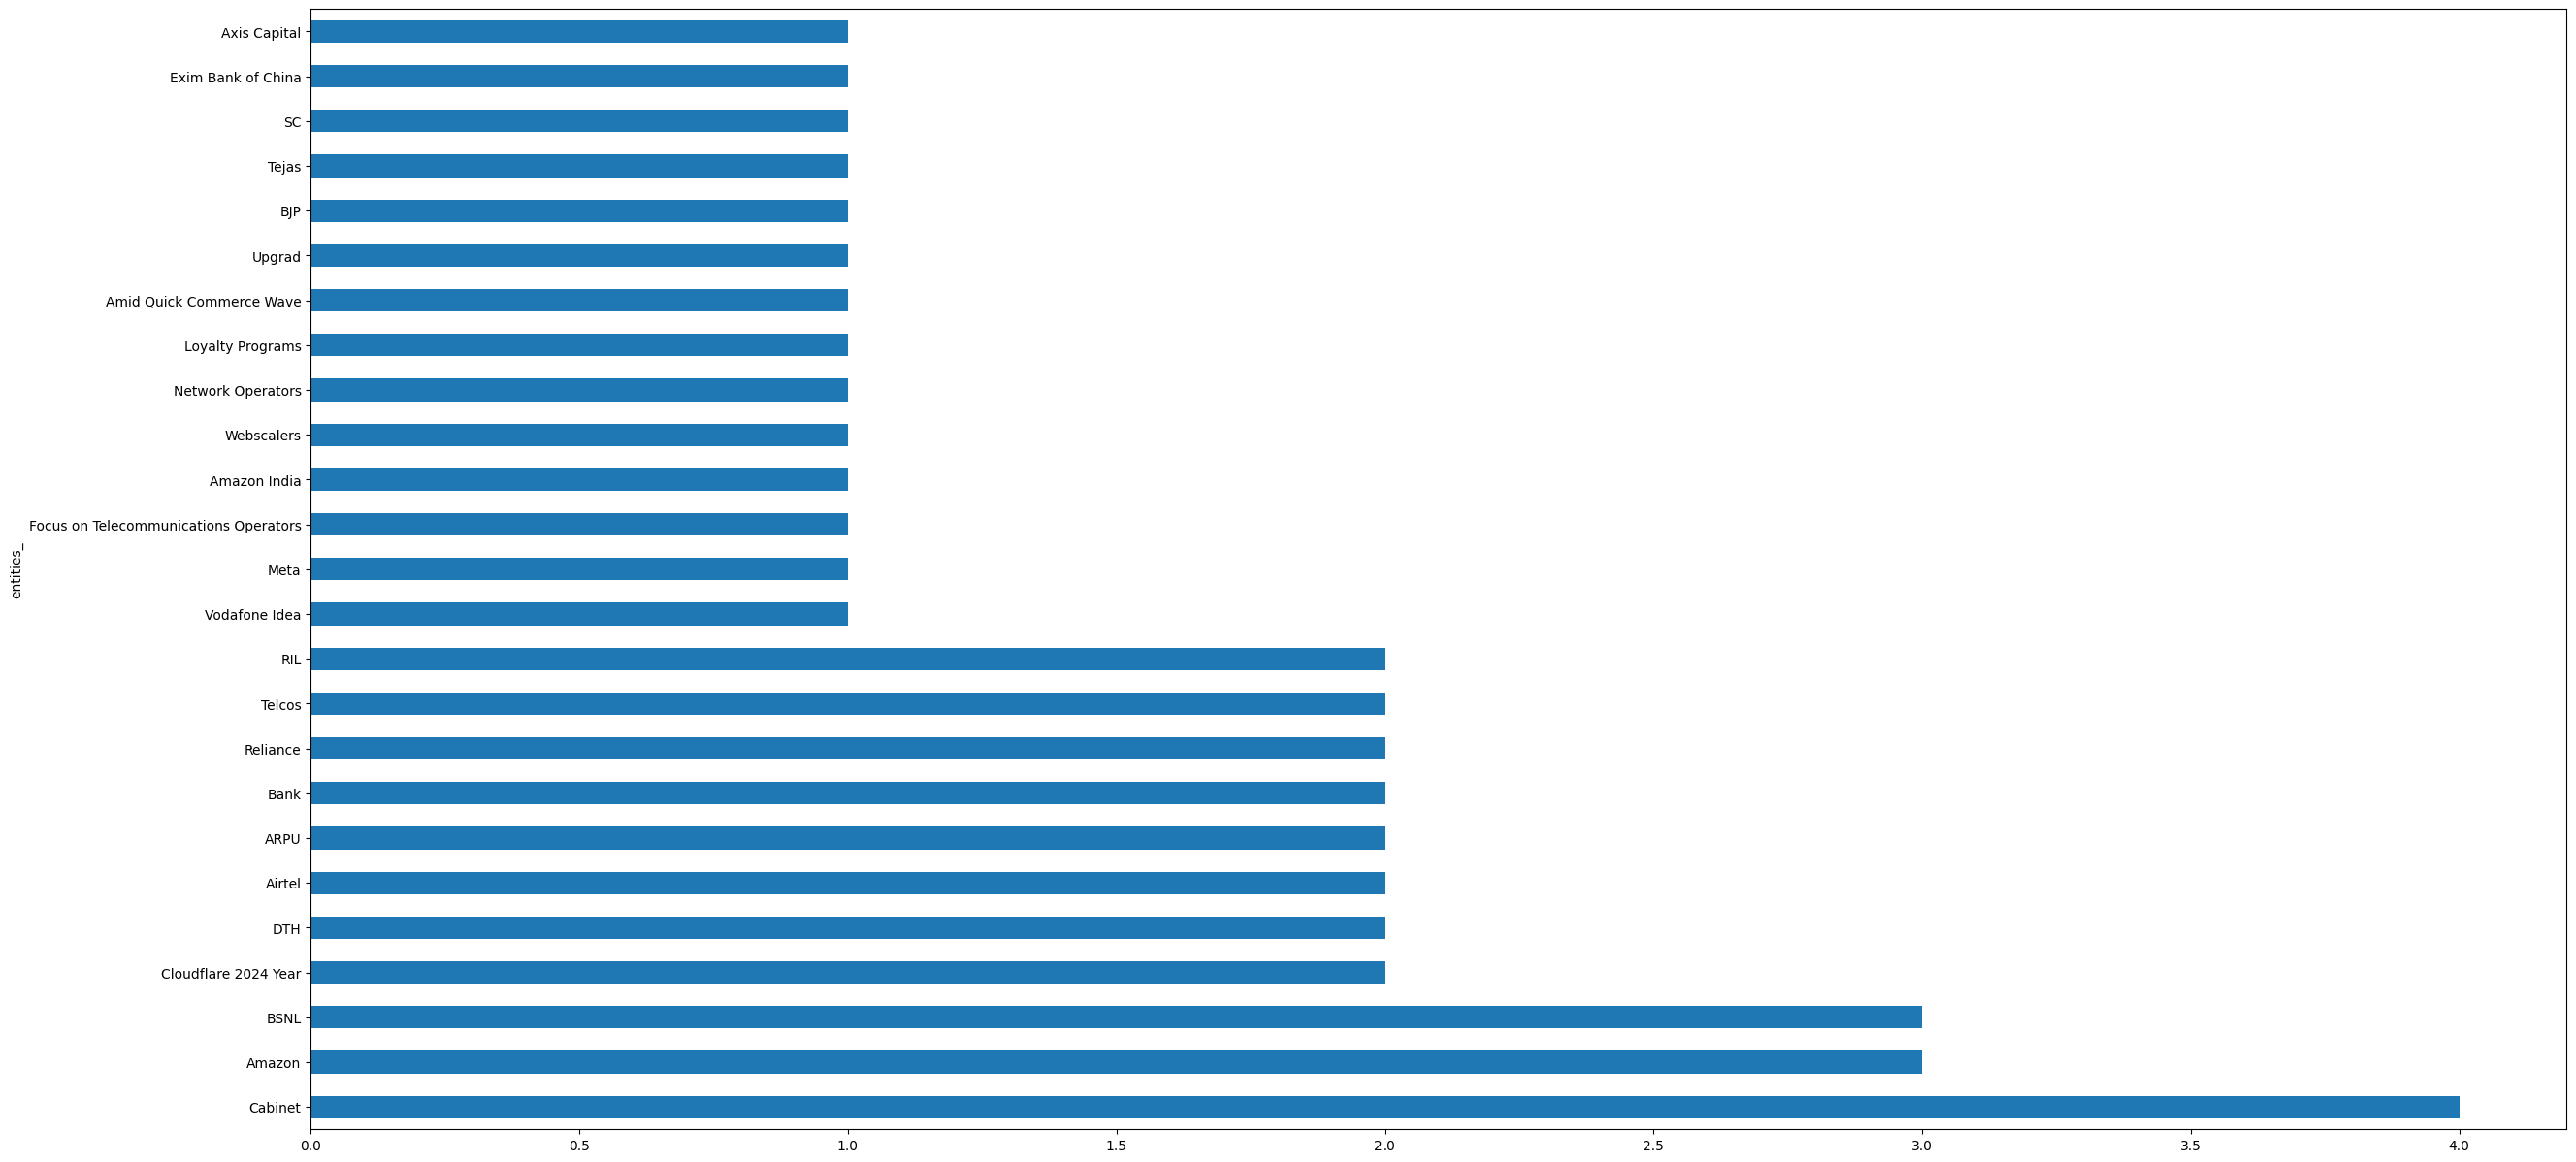

In [24]:
importance_org.nlargest(25).plot(kind="barh",figsize=(30,15))

In [25]:
importance_person = (df["entities_"][df['Labels']=='PERSON']).value_counts()

<Axes: ylabel='entities_'>

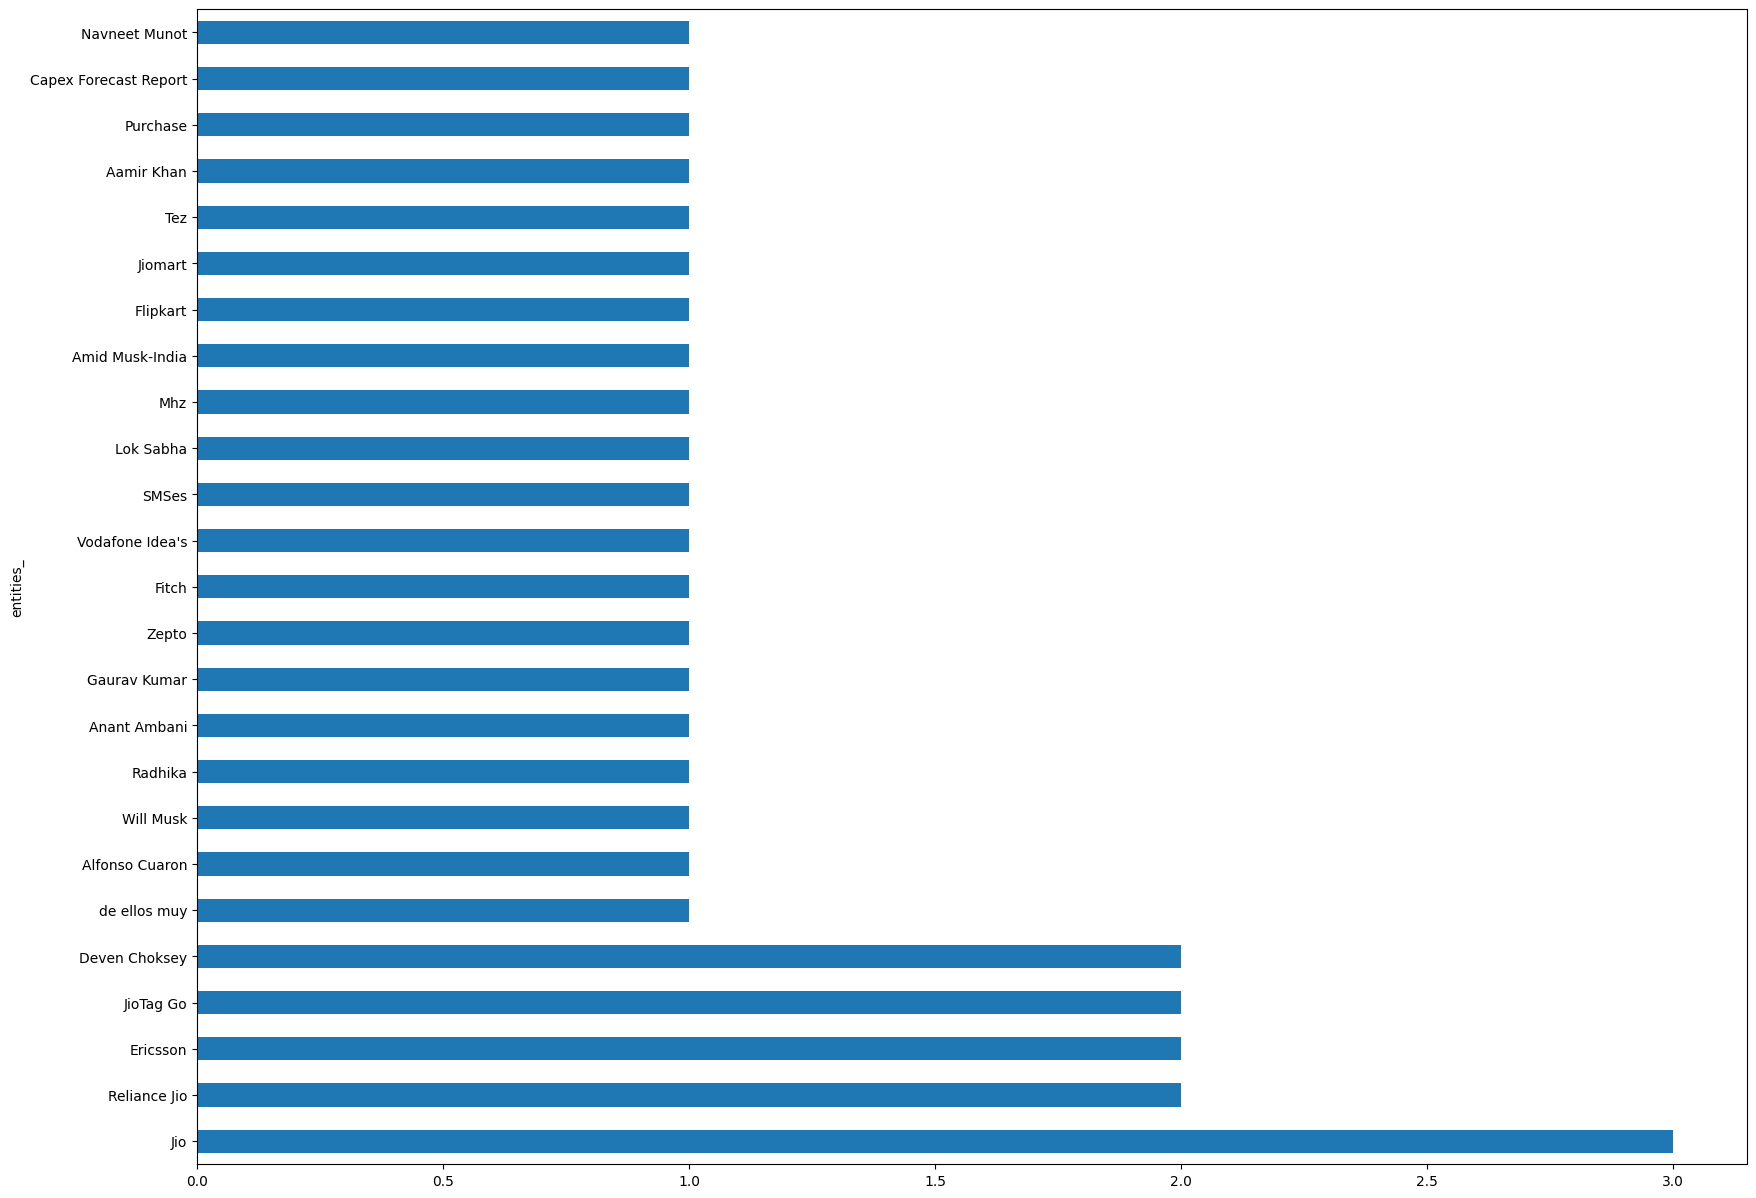

In [26]:
importance_person.nlargest(25).plot(kind="barh",figsize=(20,15))

In [27]:
importance_product = (df["entities_"][df['Labels']=='PRODUCT']).value_counts()

<Axes: ylabel='entities_'>

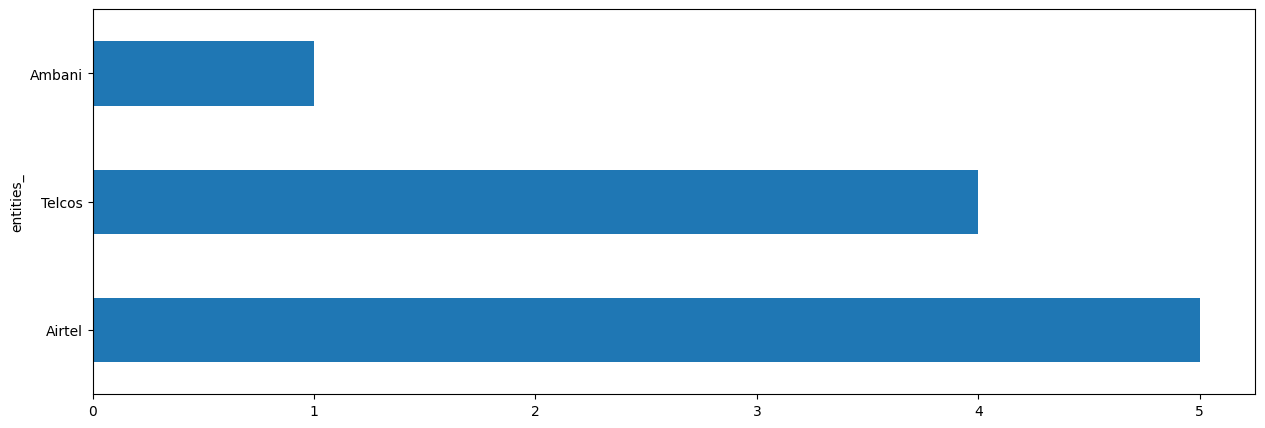

In [28]:
importance_product.nlargest(5).plot(kind="barh",figsize=(15,5))

In [29]:
importance_norp = (df["entities_"][df['Labels']=='NORP']).value_counts()

<Axes: ylabel='entities_'>

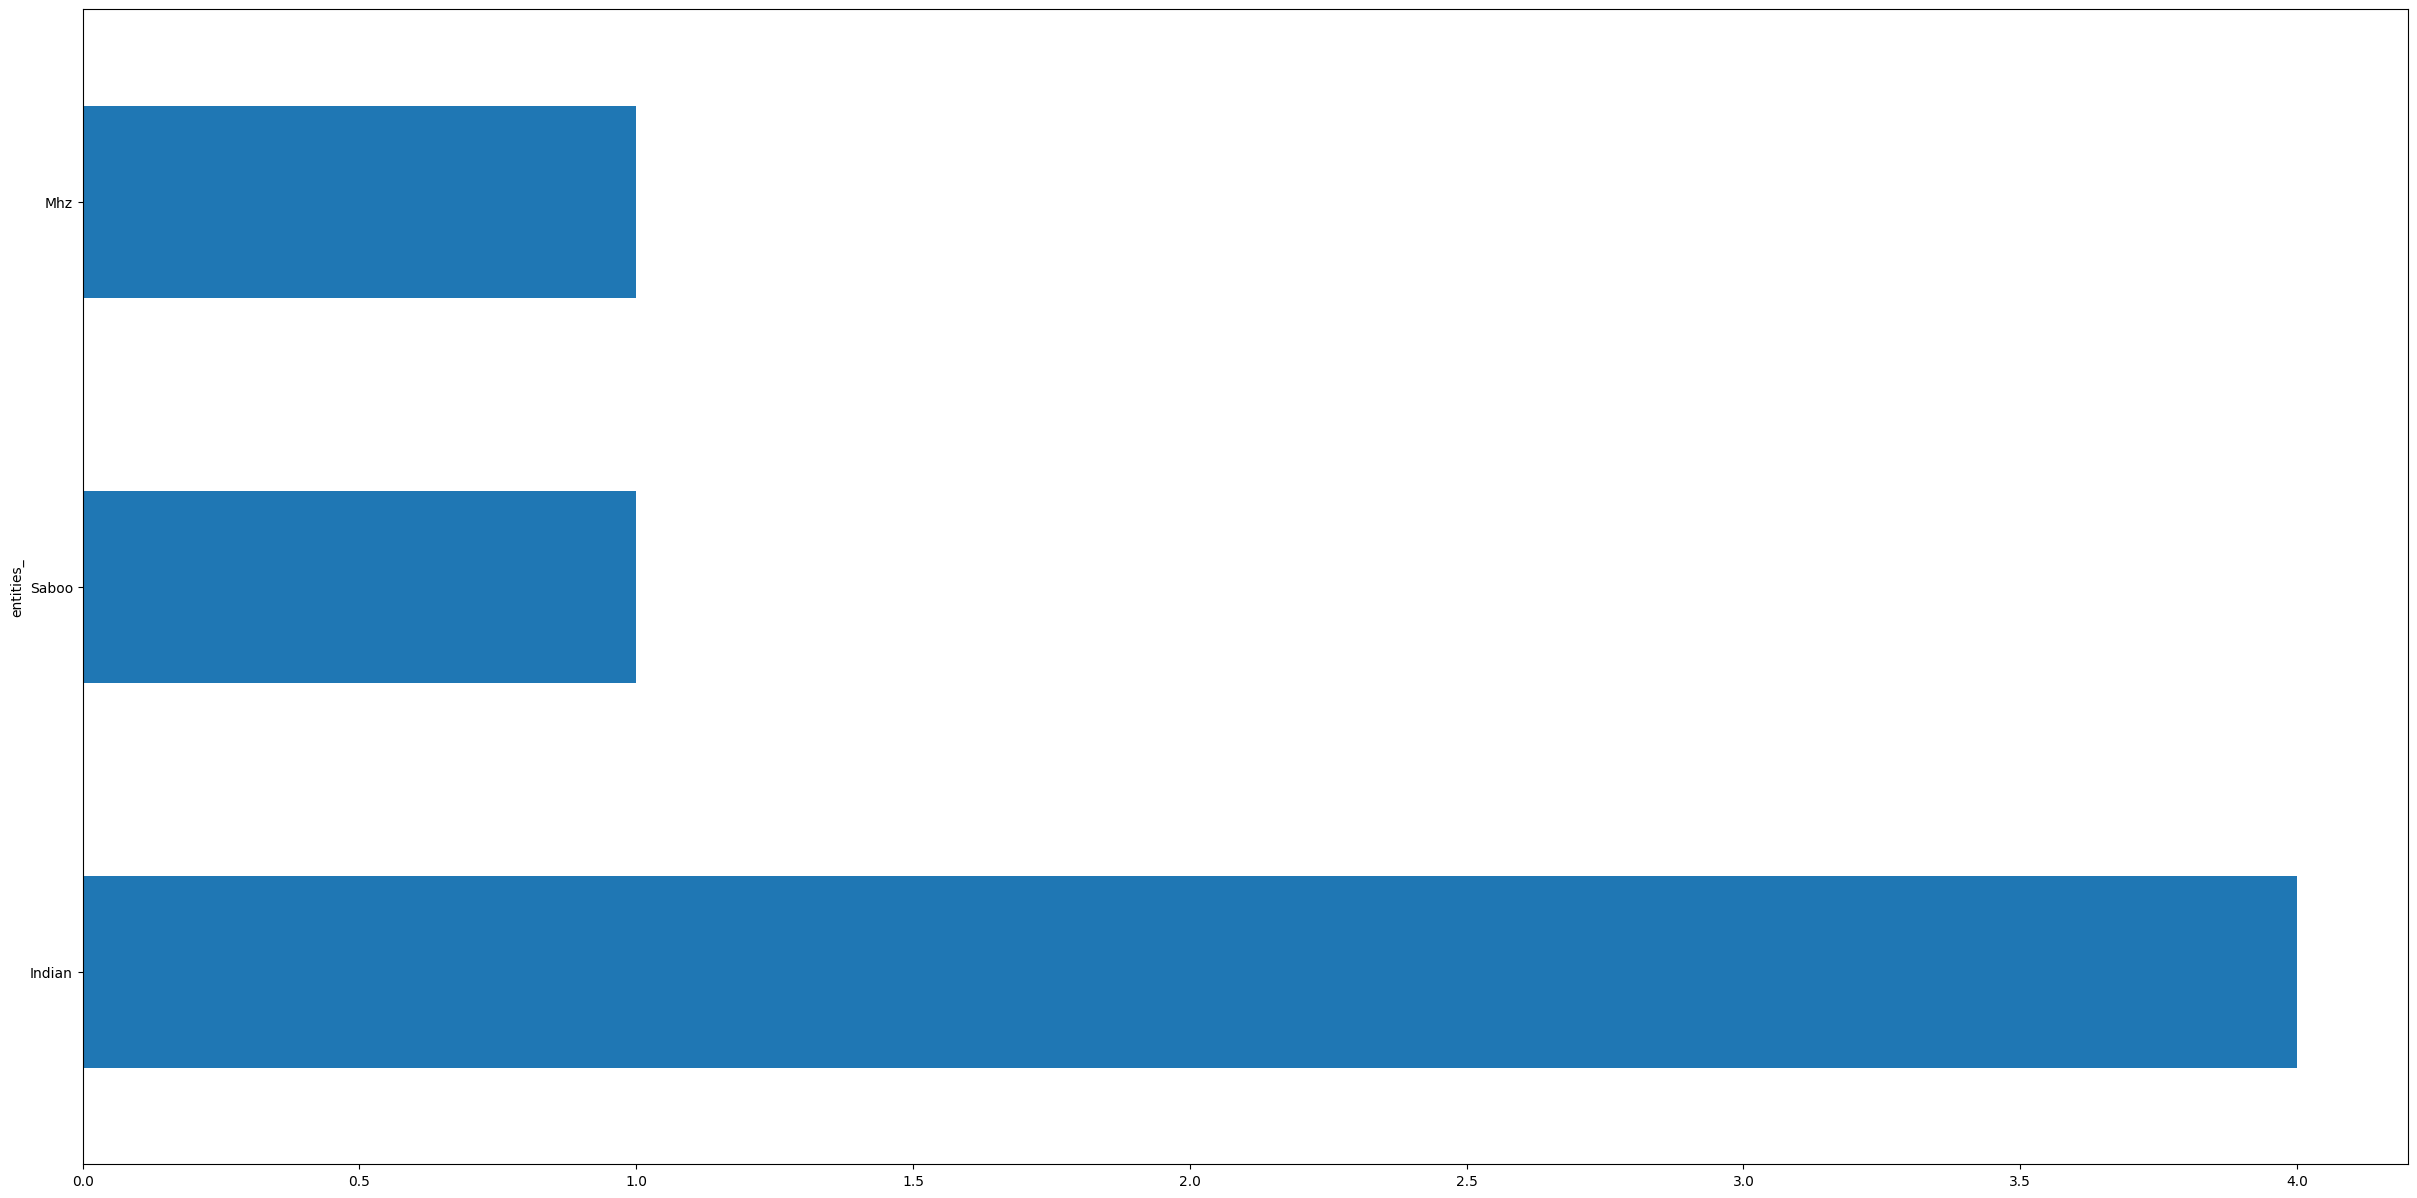

In [30]:
importance_norp.nlargest(15).plot(kind="barh",figsize=(30,15))

In [31]:
n=100
top_n_levels=pd.DataFrame(df["entities_"].value_counts().head(n))

In [32]:

top_n_levels

,count
entities_,
India,14
Airtel,8
Telcos,6
5,5
Indian,4
...,...
third,1
DoCA,1
Forrester,1


In [34]:
df

,Labels,entities_
0,CARDINAL,1.300
1,PERSON,de ellos muy
2,GPE,India
3,ORG,Cloudflare 2024 Year
4,GPE,Review
...,...,...
213,ORG,Amazon
214,PERSON,Tez
215,ORG,RIL
216,PERCENT,18%


In [35]:
df.to_csv('top_n_entities1.csv')

In [39]:
!cp top_n_entities1.csv "/content/drive/My Drive/Programming for Ai"

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
